<a href="https://colab.research.google.com/github/ThaniNikolaou/DataJour/blob/main/Homework_Week5_NikolaouTheodora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Θα αναλύσουμε δεδομένα για τρομερά ατυχήματα που έχουν συμβεί σε εργαζόμενους. 
Το dataset είναι από εδώ: https://www.osha.gov/severeinjury/index.html

Σήμερα θα κάνετε μόνοι σας ανάλυση στα δεδομένα με βάση όσα έχετε μάθει μέχρι στιγμής! Για να μάθετε περισσότερα για τους κωδικούς των ατυχημάτων πρέπει να διαβάσετε το αντίστοιχο documentation ( https://www.bls.gov/iif/oshoiics.htm), αυτό είναι η πρακτική στις περισσότερες περιπτώσεις που παίρνουμε έτοιμα δεδομένα από κάποια υπηρεσία. 

In [ ]:
import numpy as np
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
accidents = pd.read_csv("/content/January2015toJuly2022.csv", encoding="latin-1")

FileNotFoundError: ignored

In [ ]:
accidents.head()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,...,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN


## Πετάμε τις στήλες που δεν χρειαζόμαστε

In [ ]:
accidents.drop(["ID","UPA","Address1","Address2","Primary NAICS","Inspection",
         "Nature","Part of Body","Event","Source","Secondary Source"],axis=1,inplace=True)

In [ ]:
accidents.head(10)

,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,Final Narrative,NatureTitle,Part of Body Title,EventTitle,SourceTitle,Secondary Source Title
0,1/1/2015,FCI Otisville Federal Correctional Institution,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,1.0,0.0,Three correctional facility guards were escort...,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker,Inmate or detainee in custody
1,1/1/2015,Kalahari Manufacturing LLC,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,1.0,0.0,Employee in the Machine Shop received second d...,Second degree heat (thermal) burns,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches",NaN
2,1/1/2015,Schneider National Bulk Carrier,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,1.0,0.0,A truck driver fell approximately 4 feet while...,"Traumatic injuries and disorders, unspecified",Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck",Ladders-fixed
3,1/1/2015,PEPSI BOTTLING GROUP INC.,MACON,GEORGIA,31206.0,32.77,-83.65,1.0,0.0,An employee's leg was pinned between a truck a...,"Soreness, pain, hurt-nonspecified injury","Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered,"Truck-motorized freight hauling and utility, u..."
4,1/1/2015,North American Pipe Corporation,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,1.0,0.0,An employee working on the Line 6 Auto-Beller ...,Fractures,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi...",NaN
5,1/1/2015,"The Home Depot, Inc.",CAPE CORAL,FLORIDA,33909.0,26.68,-81.91,1.0,0.0,An employee was hospitalized after slipping an...,"Soreness, pain, hurt-nonspecified injury",Elbow(s),Fall on same level due to slipping,"Floors, walkways, ground surfaces, unspecified",NaN
6,1/1/2015,Gopher Resource,TAMPA,FLORIDA,33619.0,27.96,-82.38,0.0,1.0,Employee working the flipping machine at the c...,Amputations,Fingertip(s),Caught in running equipment or machinery durin...,"Special process machinery, unspecified",NaN
7,1/2/2015,"Foster Trucking, Inc.",GILL,COLORADO,80624.0,40.47,-104.51,1.0,0.0,Employee sustained burns during line tie-in op...,"Heat (thermal) burns, unspecified",Nonclassifiable,Nonclassifiable,Nonclassifiable,NaN
8,1/2/2015,Trinidad Drilling,WOODWARD,OKLAHOMA,73801.0,36.42,-99.43,1.0,0.0,One employee was hospitalized after being stru...,"Traumatic injuries and disorders, unspecified",Nonclassifiable,"Struck by object or equipment, unspecified","Tires, except bike",NaN
9,1/2/2015,The Krystal Company,ORLANDO,FLORIDA,32808.0,28.55,-81.46,0.0,1.0,An associate was using a knife to open a bag o...,Amputations,Fingertip(s),Injured by slipping or swinging object held by...,"Knives, unspecified or n.e.c.",NaN


In [ ]:
accidents.shape

(75653, 15)

## Και από εδώ και πέρα ξεκινούν οι δικές σας 10 ερωτήσεις στα δεδομένα! Φτιάξτε γραφήματα και βρείτε π.χ. σε ποιες βιομηχανίες συμβαίνουν τα περισσότερα ατυχήματα κλπ. Καλή επιτυχία!

1. Σε ποια πολιτεία γίνονται τα περισσότερα ατυχήματα;


<Axes: >

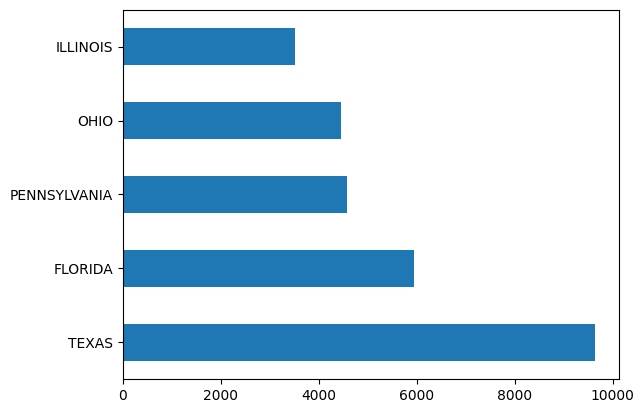

In [ ]:
accidents['State'].value_counts().head(5).plot(kind='barh')

2. Σε ποιες βιομηχανίες γίνονται τα περισσότερα ατυχήματα;

<Axes: >

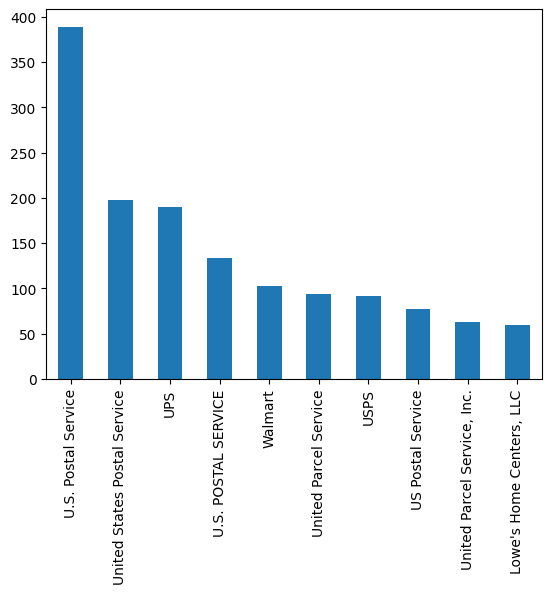

In [ ]:
accidents['Employer'].value_counts().head(10).plot(kind='bar')

3. Σε ποιο μέρος του σώματος χτυπάνε περισσότερες φορές;

<Axes: >

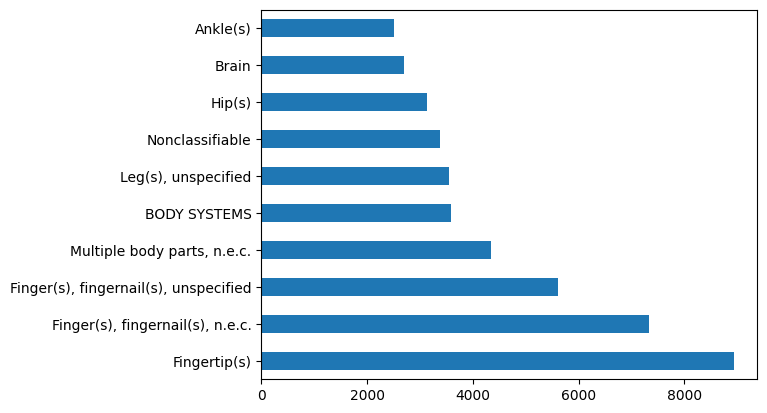

In [ ]:
accidents['Part of Body Title'].value_counts().head(10).plot(kind='barh')

4. Πότε γίνονται τα περισσότερα ατυχήματα;

<Axes: >

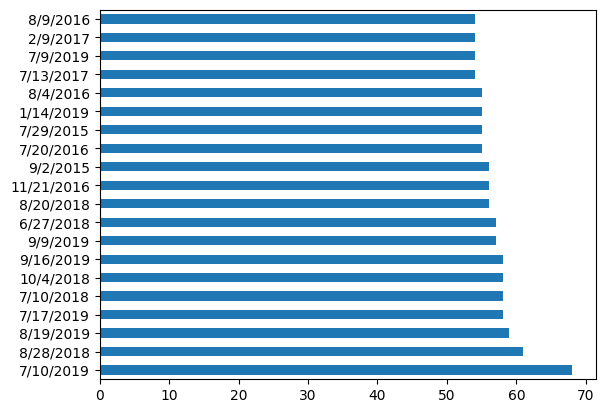

In [ ]:
accidents['EventDate'].value_counts().head(20).plot(kind='barh')


5. Πόσα ατυχήματα γίνονται την Πρωτοχρονιά;

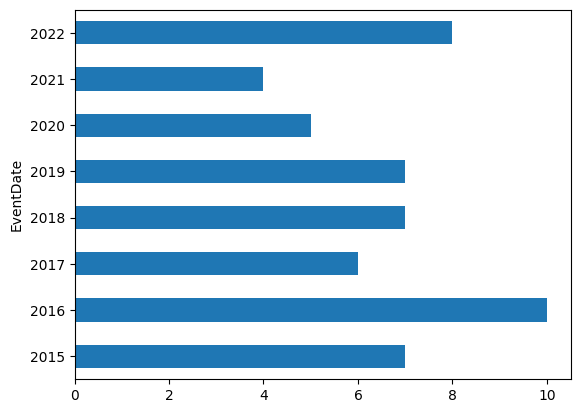

In [ ]:
accidents['EventDate'] = pd.to_datetime(accidents['EventDate'])
nyd_accidents = accidents[accidents['EventDate'].dt.month == 1][accidents['EventDate'].dt.day == 1]
nyd_accidents_by_year = nyd_accidents.groupby(nyd_accidents['EventDate'].dt.year)['EventDate'].count().plot(kind="barh")

6. Ποια είναι η σχέση αιτίας ατυχήματος και αριθμού νοσηλευομένων για τις 10 πρώτες περιπτώσεις;

<Axes: xlabel='Hospitalized', ylabel='SourceTitle'>

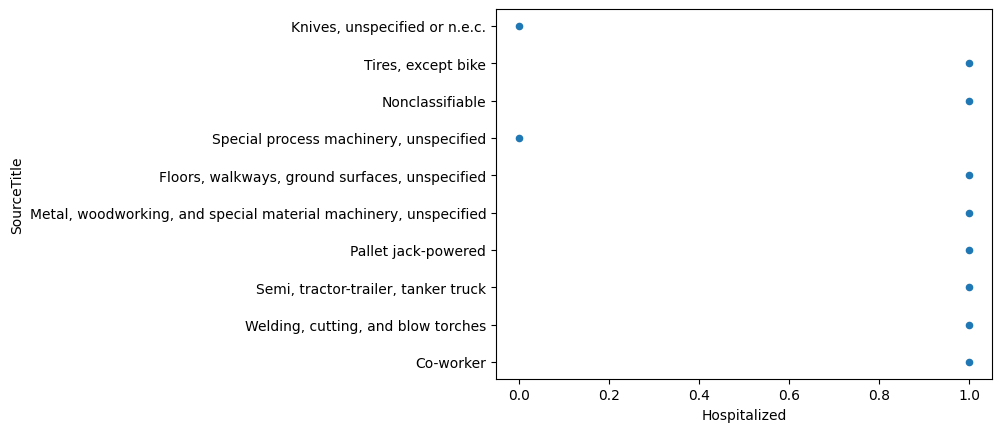

In [ ]:
accidents.head(10).plot(kind='scatter', y='SourceTitle', x='Hospitalized')

7. Ποια είναι οι αιτίες ακρωτηριασμού με παράμετρο Amputation == 1.0;

<Axes: xlabel='Amputation', ylabel='NatureTitle'>

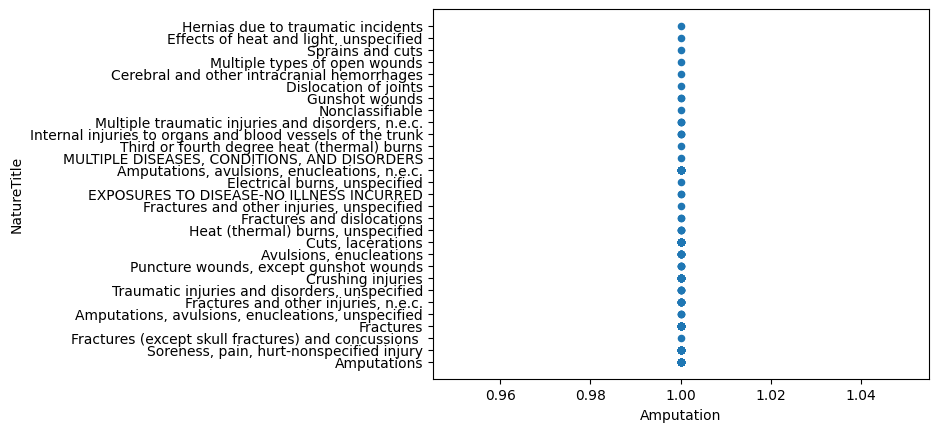

In [ ]:
accidents[accidents['Amputation'] == 1.0].plot(kind='scatter', y='NatureTitle', x='Amputation')

8. Υπάρχει συσχέτιση μεταξύ του ΤΚ και του αριθμού νοσηλευομένων;

Zip    Axes(0.125,0.11;0.775x0.77)
dtype: object

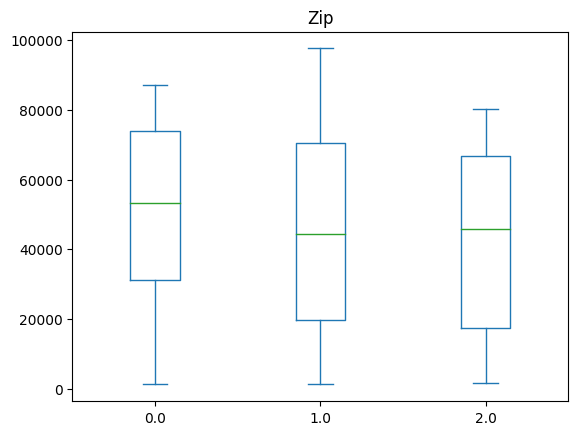

In [ ]:
accidents.head(1000).plot(kind='box', column='Zip', by='Hospitalized')